In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, LSTM, GRU, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [3]:
i = Input(shape=x_train[0].shape)
x = LSTM(32)(i)
x = LSTM(64)(i)
x = LSTM(128)(i)
x = LSTM(256)(i)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)

In [5]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy'],
)

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs =10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 218s 115ms/step - accuracy: 0.9839 - loss: 0.0526 - val_accuracy: 0.9812 - val_loss: 0.0656
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 244s 105ms/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.9849 - val_loss: 0.0478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 223s 116ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9746 - val_loss: 0.0787
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 116ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9891 - val_loss: 0.0389
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 220s 117ms/step - accuracy: 0.9937 - loss: 0.0216 - val_accuracy: 0.9868 - val_loss: 0.0457
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 211s 113ms/step - accuracy: 0.9936 - loss: 0.0214 - val_accuracy: 0.9895 - val_loss: 0.0380
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 221s 118ms/step - accuracy: 0.9953 - loss: 0.0160 - val_accuracy: 0.9871 - val_loss: 0.0448
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 109ms/step - ac

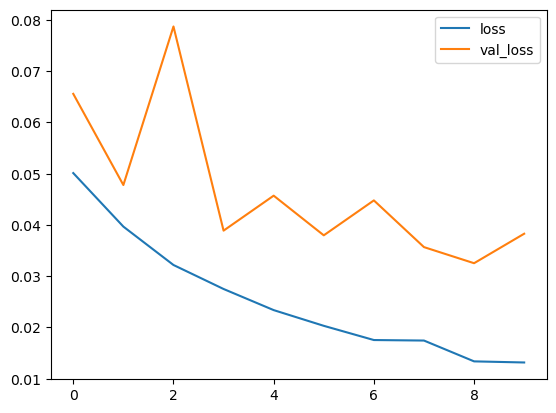

In [6]:
plt.plot(r.history['loss'], label ='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

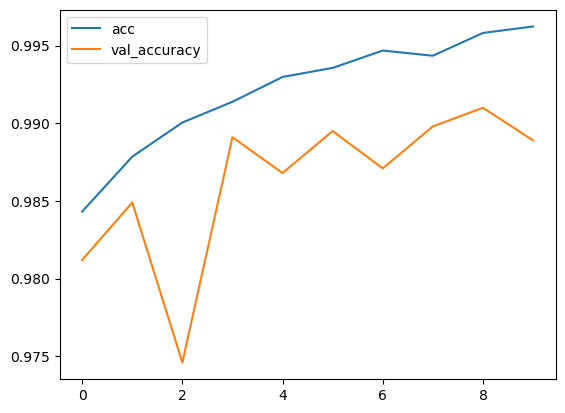

In [7]:
plt.plot(r.history['accuracy'], label ='acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step
Confusion matrix, without normalization
[[ 966    0    4    0    2    1    4    2    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    1 1020    0    1    0    0    9    1    0]
 [   0    0    2  994    0    7    0    4    2    1]
 [   0    0    0    0  965    0    7    1    3    6]
 [   2    2    0    1    0  881    2    1    3    0]
 [   0    4    0    0    0    1  952    0    1    0]
 [   0    4    5    0    2    0    0 1015    0    2]
 [   0    0    2    1    0    3    0    1  965    2]
 [   0    0    0    1    2    0    1    5    4  996]]


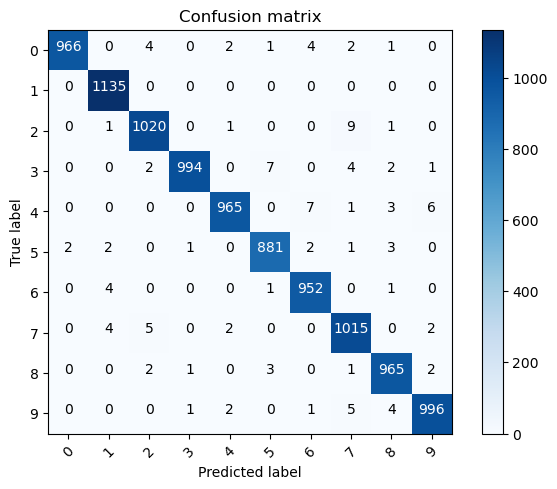

In [8]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming model, x_test, and y_test are defined
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


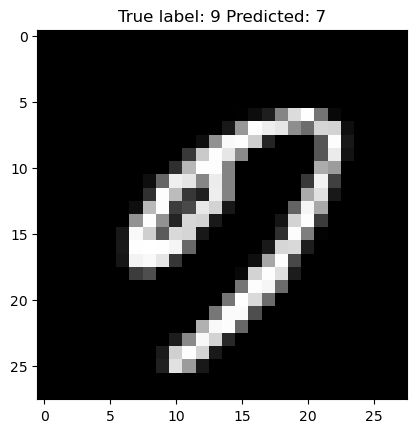

In [14]:
import numpy as np
misclassified_idx = np.where(p_test!= y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));